# LAB 03

# KNN design and implementation

**es1**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv ("iris.csv", header = None)
# header=None parameter -- meaning that Pandas will expect to find a valid data point in the first row.

In [2]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**es2,es3**

In [3]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [4]:
X = df.values[:, :4].astype(float) # all rows (:), columns 0 -> 3 (:4)
y = df.values[:, 4] # all rows (:), 4th column (4)
X.shape, y.shape

((150, 4), (150,))

In [5]:
mask_True = [True] * 120 # 80%
mask_False = [False] * 30 # 20%
mask = np.array(mask_True + mask_False)
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [6]:
np.random.shuffle(mask) # ora li mischio tutti
mask

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,

In [7]:
X_train = X[mask] # prendo l'80%
X_test = X[~mask] # prendo il restante 20%

y_train = y[mask] # prendo l'80%
y_test = y[~mask] # prenso il restante 20%
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((120, 4), (30, 4), (120,), (30,))

In [8]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({'Iris-versicolor': 41, 'Iris-virginica': 41, 'Iris-setosa': 38}),
 Counter({'Iris-setosa': 12, 'Iris-versicolor': 9, 'Iris-virginica': 9}))

**es4**

In [9]:
class KNearestNeighbors1:
    def __init__(self, k, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        """
        Store the 'prior knowledge ' of you model that will be used to predict new labels .
        : param X : input data points , ndarray , shape = (R,C).
        : param y : input labels , ndarray , shape = (R ,).
        """
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        """
        Run the KNN classification on X.
        : param X: input data points , ndarray , shape = (N,C).
        : return : labels : ndarray , shape = (N ,).
        """
        pass

**es5**

In [10]:
# EUCLIDEAN DISTANCE

In [11]:
def euclidean_non_numpy(p, q):
    cumul = 0
    for i in range(len(p)):
        cumul += (p[i] - q[i])**2
    return cumul ** 0.5
    
def euclidean_numpy(p, q): # tratto com
    return ((p-q)**2).sum()**.5

In [12]:
X_train_reshaped = np.expand_dims(X_train, 1) # np.expand_dims(array, axis) aggiunge una nuova dimensione all’array lungo l’asse specificato.
X_train_reshaped.shape

(120, 1, 4)

In [13]:
X_diff = X_train_reshaped - X_test
X_diff.shape

(120, 30, 4)

In [14]:
dist_matrix = ((X_diff**2).sum(axis=2))**.5
# Sommi i quadrati lungo l’asse 2 (cioè lungo le feature), ottenendo la somma dei quadrati delle differenze per ciascuna coppia di punti.
# facciuo la radice per ottenere la distanza euclidea
dist_matrix.shape

(120, 30)

In [15]:
i = 25
j = 14
dist_matrix[i,j], euclidean_numpy(X_train[i], X_test[j])

(np.float64(3.0033314835362415), np.float64(3.0033314835362415))

In [16]:
def euclidean(X_train, X_test):
    X_train_reshaped = np.expand_dims(X_train, 1)
    X_diff = X_train_reshaped - X_test
    dist_matrix = ((X_diff**2).sum(axis=2))**.5
    return dist_matrix

euclidean(X_train, X_test)

array([[0.50990195, 0.17320508, 0.46904158, ..., 4.84045452, 4.88057374,
        5.01996016],
       [0.3       , 0.42426407, 0.17320508, ..., 4.85180379, 4.89182992,
        5.07247474],
       [0.24494897, 0.5       , 0.31622777, ..., 4.87339717, 4.9132474 ,
        5.10489961],
       ...,
       [4.66154481, 4.39772669, 4.45757782, ..., 0.46904158, 0.5       ,
        0.60827625],
       [4.84871117, 4.58911756, 4.67225855, ..., 0.69282032, 0.67082039,
        0.6244998 ],
       [4.29883705, 4.0607881 , 4.10609303, ..., 0.79372539, 0.83666003,
        1.12249722]], shape=(120, 30))

In [17]:
# COSINE DISTANCE

In [18]:
dot_prods = X_train @ X_test.T # the @ operator is a short-hand for the matrix multiplication function
dot_prods.shape

(120, 30)

In [19]:
X_train_norm = ((X_train**2).sum(axis=1)**.5).reshape(-1,1) # Calcola la norma euclidea di ogni riga e la rende vettore colonna
X_test_norm = ((X_test**2).sum(axis=1)**.5).T # Calcola le norme dei vettori di test, ma .T non cambia nulla se è 1D

In [20]:
dist_matrix = 1 - abs(dot_prods / X_train_norm.reshape(-1,1) / X_test_norm)

In [21]:
def cosine(X_train, X_test):
    X_train_norm = ((X_train**2).sum(axis=1)**.5).reshape(-1,1)
    X_test_norm = ((X_test**2).sum(axis=1)**.5)
    dot_prods = X_train @ X_test.T 
    dist_matrix = 1 - abs(dot_prods / X_train_norm.reshape(-1,1) / X_test_norm)
    return dist_matrix

cosine(X_train, X_test)

array([[1.26527175e-05, 2.20406477e-04, 1.23549111e-03, ...,
        1.31113782e-01, 1.32972452e-01, 1.21744289e-01],
       [1.20854727e-03, 1.08610426e-03, 3.47906668e-04, ...,
        1.17493455e-01, 1.19361881e-01, 1.09220997e-01],
       [7.83016618e-04, 2.30526711e-04, 6.14085381e-04, ...,
        1.12264688e-01, 1.14135699e-01, 1.04040386e-01],
       ...,
       [1.06371327e-01, 9.97798295e-02, 9.54683371e-02, ...,
        1.22522611e-03, 1.36337068e-03, 6.88414167e-04],
       [1.14330965e-01, 1.07526136e-01, 1.05294328e-01, ...,
        2.83964929e-03, 2.65039699e-03, 1.38667577e-03],
       [1.11540581e-01, 1.04482513e-01, 1.00773155e-01, ...,
        1.33079650e-03, 1.57590237e-03, 1.28808123e-03]], shape=(120, 30))

In [22]:
# MANHATTAN DISTANCE

In [23]:
def manhattan(X_train, X_test):
    X_train_reshaped = np.expand_dims(X_train, 1)
    X_diff = X_train_reshaped - X_test
    dist_matrix = abs(X_diff).sum(axis=2) # come la euclidea ma faccio la differenza in valore assoluto 
    return dist_matrix

manhattan(X_train, X_test)

array([[0.8, 0.3, 0.8, ..., 8.1, 8.2, 8.4],
       [0.5, 0.6, 0.3, ..., 7.8, 7.9, 8.3],
       [0.4, 0.7, 0.4, ..., 8.1, 8.2, 8.4],
       ...,
       [7.7, 7.4, 7.3, ..., 0.8, 0.9, 1.1],
       [7.9, 7.2, 7.7, ..., 1.2, 1.1, 1.1],
       [6.8, 6.5, 6.4, ..., 1.5, 1.6, 2. ]], shape=(120, 30))

In [24]:
class KNearestNeighbors2:
    def __init__(self, k, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        self.X_train_reshaped = np.expand_dims(self.X_train, 1)
        self.X_train_norm = ((self.X_train**2).sum(axis=1)**.5).reshape(-1,1)

    def _euclidean(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = ((X_diff**2).sum(axis=2))**.5
        return dist_matrix

    def _cosine(self, X_test):
        X_test_norm = ((X_test**2).sum(axis=1)**.5)
        dot_prods = X_train @ X_test.T 
        dist_matrix = 1 - abs(dot_prods / self.X_train_norm.reshape(-1,1) / X_test_norm)
        return dist_matrix

    def _manhattan(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = abs(X_diff).sum(axis=2)
        return dist_matrix

    
    def predict(self, X_test):
        pass

**es6**

In [25]:
k = 3 # abbiamo deciso di prendere i tre più vicini
knn = dist_matrix.argsort(axis=0)[:k, :].T # prendiamo i top k training per tutti i test
# ordina indici di train per distanza (una colonna = un test), prendi i primi k e trasponi
knn

array([[  0,   7,  19],
       [ 28,  29,  19],
       [ 24,  27,  13],
       [ 24,  27,   1],
       [  0,   7,  36],
       [  0,   7,  36],
       [  5,  31,  34],
       [  5,   4,  31],
       [ 37,  19,  29],
       [  6,  13,   2],
       [  0,  11,   3],
       [ 18,   4,  15],
       [ 58,  65,  59],
       [ 48,  70,  71],
       [ 42,  46,  62],
       [ 67,  54,  42],
       [ 64,  53,  44],
       [ 76,  39,  72],
       [ 74,  75,  42],
       [ 39,  61,  41],
       [ 50,  65,  58],
       [ 66,  91, 108],
       [ 83,  85,  94],
       [109, 100, 117],
       [114,  96, 107],
       [ 85,  94,  83],
       [ 99, 110,  88],
       [ 89,  82, 112],
       [ 89,  82, 112],
       [ 95, 114, 113]])

In [26]:
y_train[knn] # accediamo al training label associato

array([['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicol

In [27]:
y_test[19]

'Iris-versicolor'

In [28]:
list(map(Counter, y_train[knn]))

[Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-virginica': 2, 'Iris-versicolor': 1}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3})]

In [29]:
def majority_voting(votes): # per assegnare la classe devo prendere il top voto
    count = Counter(votes)
    return count.most_common(1)[0][0] # most_common(n) returns a list with the n most recurring votes (n=1 -> top vote)
    # we only need the first one [0][0]

np.array(list(map(majority_voting, y_train[knn])))
#np.array([majority_voting(y_train[knn][i]) for i in range(len(y_train[knn])) ])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype='<U15')

In [43]:
def _majority_voting(votes):
    count = Counter(votes)
    return count.most_common(1)[0][0] # most_common(n) returns a list with the n most recurring votes (n=1 -> top vote)

class KNearestNeighbors3:
    def __init__(self, k, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        self.X_train_reshaped = np.expand_dims(self.X_train, 1)
        self.X_train_norm = ((self.X_train**2).sum(axis=1)**.5).reshape(-1,1)

    def _euclidean(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = ((X_diff**2).sum(axis=2))**.5
        return dist_matrix

    def _cosine(self, X_test):
        X_test_norm = ((X_test**2).sum(axis=1)**.5).T
        dot_prods = X_train @ X_test.T 
        dist_matrix = 1 - abs(dot_prods / self.X_train_norm.reshape(-1,1) / X_test_norm)
        return dist_matrix

    def _manhattan(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = abs(X_diff).sum(axis=2)
        return dist_matrix
    
    def predict(self, X_test):
        if self.distance_metric == "euclidean":
            dist_matrix = self._euclidean(X_test)
        elif self.distance_metric == "cosine":
            dist_matrix = self._cosine(X_test)
        elif self.distance_metric == "manhattan":
            dist_matrix = self._manhattan(X_test)
        else:
            raise Exception("Unknown distance metric")
        knn = dist_matrix.argsort(axis=0)[:self.k, :].T
        y_pred = np.array([ majority_voting(self.y_train[knn][i]) for i in range(len(self.y_train[knn]))])
        return y_pred

In [44]:
knn_model = KNearestNeighbors3(3, "cosine")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype='<U15')

**es7**

In [45]:
def accuracy_score(y_true, y_pred):
    return (y_true==y_pred).sum()/len(y_true) # conto quanti ne ho predetti correttamwente 

In [46]:
accuracy_score(y_test, y_pred)

np.float64(1.0)

**es8**

In [47]:
from collections import defaultdict # inizializza dizionari con valori di default a zero

def _weighted_majority_voting(votes, weights):
    # we now compute `count` as a sum of weights
    # (no longer through Counter -- which effectively
    # weighted all votes as "1")
    count = defaultdict(lambda: 0)
    for vote, weight in zip(votes, weights):
        count[vote] += weight
    return max(count.items(), key=lambda x: x[1])[0] # return the max value (use a custom key extractor)

In [48]:
weights = 1/(np.take_along_axis(dist_matrix, knn.T, 0)+1e-5)
[ _weighted_majority_voting(y_train[knn][i], weights[:, i]) for i in range(len(y_train[knn])) ]

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

In [49]:
np.take_along_axis(dist_matrix, knn.T, 0).max()

np.float64(0.0009395660236605208)

In [50]:
from collections import defaultdict

def _weighted_majority_voting(votes, weights):
    # we now compute `count` as a sum of weights
    # (no longer through Counter -- which effectively
    # weighted all votes as "1")
    count = defaultdict(lambda: 0)
    for vote, weight in zip(votes, weights):
        count[vote] += weight
    return max(count.items(), key=lambda x: x[1])[0] # return the max value (use a custom key extractor)


def _majority_voting(votes):
    count = Counter(votes)
    return count.most_common(1)[0][0] # most_common(n) returns a list with the n most recurring votes (n=1 -> top vote)

class KNearestNeighbors4:
    def __init__(self, k, distance_metric="euclidean", weights="uniform"):
        self.k = k
        self.distance_metric = distance_metric
        self.weights = weights
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        self.X_train_reshaped = np.expand_dims(self.X_train, 1)
        self.X_train_norm = ((self.X_train**2).sum(axis=1)**.5).reshape(-1,1)

    def _euclidean(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = ((X_diff**2).sum(axis=2))**.5
        return dist_matrix

    def _cosine(self, X_test):
        X_test_norm = ((X_test**2).sum(axis=1)**.5).T
        dot_prods = X_train @ X_test.T 
        dist_matrix = 1 - abs(dot_prods / self.X_train_norm.reshape(-1,1) / X_test_norm)
        return dist_matrix

    def _manhattan(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = abs(X_diff).sum(axis=2)
        return dist_matrix
    
    def predict(self, X_test):
        if self.distance_metric == "euclidean":
            dist_matrix = self._euclidean(X_test)
        elif self.distance_metric == "cosine":
            dist_matrix = self._cosine(X_test)
        elif self.distance_metric == "manhattan":
            dist_matrix = self._manhattan(X_test)
        else:
            raise Exception("Unknown distance metric")
        
        knn = dist_matrix.argsort(axis=0)[:self.k, :].T
        if self.weights == "uniform":
            y_pred = np.array([ majority_voting(self.y_train[knn][i]) for i in range(len(self.y_train[knn])) ])
        elif self.weights == "distance":
            weights = 1/(np.take_along_axis(dist_matrix, knn.T, 0)+1e-5)
            y_pred = np.array([ _weighted_majority_voting(y_train[knn][i], weights[:, i]) for i in range(len(y_train[knn])) ])
        return y_pred

In [57]:
knn_model = KNearestNeighbors4(5, "manhattan", "uniform")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(1.0)

In [52]:
list(y_test).count(Counter(y_train).most_common(1)[0][0]) / len(y_test)

0.3

In [53]:
knn_model = KNearestNeighbors(120, "euclidean", "uniform")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(0.6)

In [54]:
knn_model = KNearestNeighbors(120, "euclidean", "distance")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(1.0)

**es9**

In [58]:
df = pd.read_csv("mnist_test.csv", header=None)
X = df.values[:, 1:].astype(float) # all cols but the first one (784 cols in this case)
y = df.values[:, 0] # first column, with the label info

# here, we use vstack and hstack to stack (vertical and horizontally, respectively)
# different arrays/lists.
X_100 = np.vstack([ X[y==d][:100] for d in range(10) ])
y_100 = np.hstack([ [d]*100 for d in range(10) ])

# generalized version of the previous code (generates 80/20 split)
mask = np.array([True] * int(len(X_100)*.8) + [False] * (len(X_100)-int(len(X_100)*.8)))
np.random.shuffle(mask)

X_train = X_100[mask]
X_test = X_100[~mask]

y_train = y_100[mask]
y_test = y_100[~mask]
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((800, 784), (200, 784), (800,), (200,))

In [59]:
knn_model = KNearestNeighbors4(5, "euclidean", "uniform")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(0.82)

In [60]:
knn_model = KNearestNeighbors4(800, "euclidean", "uniform")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("uniform", accuracy_score(y_test, y_pred))

knn_model = KNearestNeighbors4(800, "euclidean", "distance")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("distance", accuracy_score(y_test, y_pred))

uniform 0.065
distance 0.41


**es10**

In [61]:
accuracies = []
k_values = list(range(3, 104, 10))
for k in k_values:
    knn_model = KNearestNeighbors4(k, "euclidean", "distance")
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(k, accuracy)

3 0.835
13 0.815
23 0.78
33 0.73
43 0.695
53 0.695
63 0.685
73 0.665
83 0.67
93 0.645
103 0.64


Text(0, 0.5, 'Accuracy')

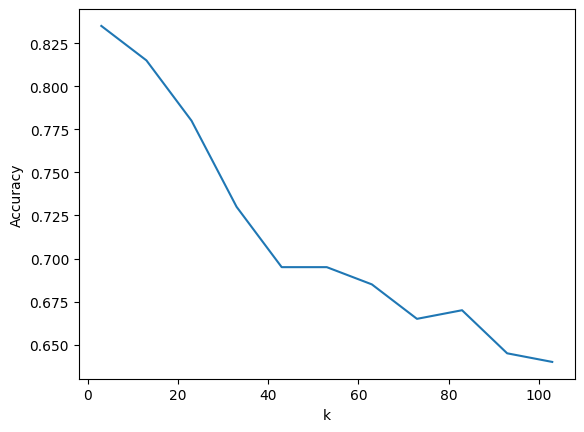

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")

2 0.815
3 0.835
4 0.835
5 0.825
6 0.82
7 0.815
8 0.815
9 0.805
10 0.805
11 0.81
12 0.82
13 0.815
14 0.805


Text(0, 0.5, 'Accuracy')

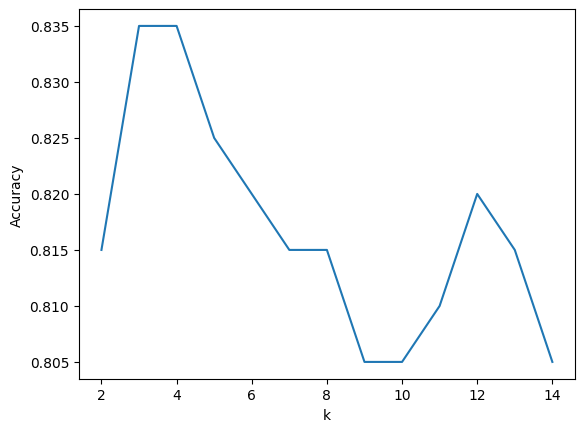

In [63]:
accuracies = []
k_values = list(range(2, 15))
for k in k_values:
    knn_model = KNearestNeighbors(k, "euclidean", "distance")
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(k, accuracy)

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")

(0.5, 1.0)

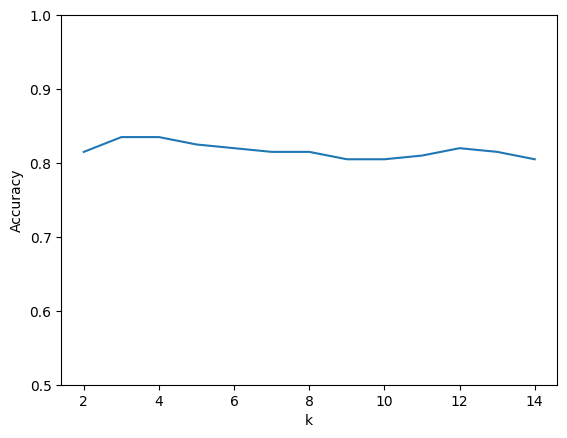

In [64]:
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0.5,1)

In [65]:
for k in range(2, 7):
    for weights in ["uniform", "distance"]:
        for distance in [ "euclidean", "manhattan", "cosine"]:
            knn_model = KNearestNeighbors(k, distance, weights)
            knn_model.fit(X_train, y_train)
            y_pred = knn_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(accuracy, k, weights, distance)

0.815 2 uniform euclidean
0.795 2 uniform manhattan
0.85 2 uniform cosine
0.815 2 distance euclidean
0.795 2 distance manhattan
0.85 2 distance cosine
0.835 3 uniform euclidean
0.815 3 uniform manhattan
0.865 3 uniform cosine
0.835 3 distance euclidean
0.815 3 distance manhattan
0.865 3 distance cosine
0.835 4 uniform euclidean
0.835 4 uniform manhattan
0.875 4 uniform cosine
0.835 4 distance euclidean
0.835 4 distance manhattan
0.875 4 distance cosine
0.82 5 uniform euclidean
0.805 5 uniform manhattan
0.865 5 uniform cosine
0.825 5 distance euclidean
0.805 5 distance manhattan
0.87 5 distance cosine
0.815 6 uniform euclidean
0.81 6 uniform manhattan
0.88 6 uniform cosine
0.82 6 distance euclidean
0.81 6 distance manhattan
0.88 6 distance cosine
